# 첫 번째 신경망 훈련하기: 기초적인 분류 문제

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

In [2]:
# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.0.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## 데이터 탐색

In [7]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

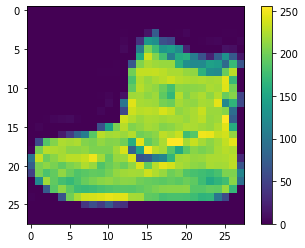

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## 데이터 전처리

In [17]:
train_images[1][:2]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0]], dtype=uint8)

In [18]:
train_images = train_images / 255.0
train_images[1][:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [19]:
test_images = test_images / 255.0

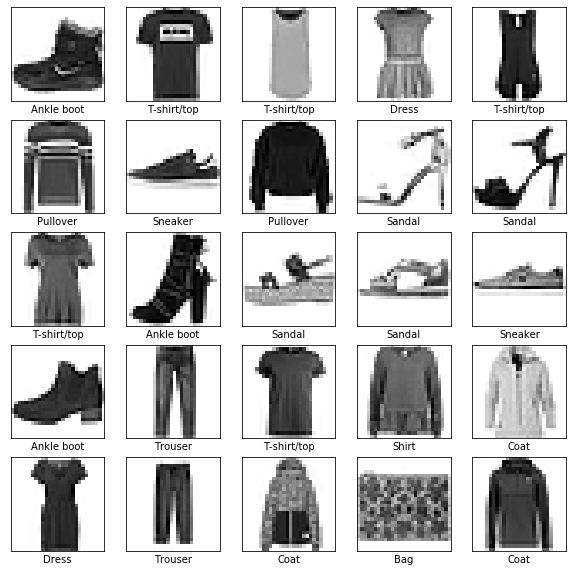

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

 `flatten`
 - tf.keras.layers.Flatten은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환
 
`Dense` : output = activation(dot(input, kernel) + bias)

 - tf.keras.layers.Dense 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 
     - 첫 번째 Dense 층은 128개의 노드(또는 뉴런)를 가집니다. 
     - 두 번째 (마지막) 층은 10개의 노드의 소프트맥스(softmax) 층입니다. 
     - 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 
     - 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.
     

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

     
손실 함수(Loss function)

- 훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.

옵티마이저(Optimizer)

- 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.

지표(Metrics)

- 훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

## 모델 훈련

In [25]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4979 - accuracy: 0.8249
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3746 - accuracy: 0.8633
Epoch 3/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3364 - accuracy: 0.8760
Epoch 4/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3127 - accuracy: 0.8857
Epoch 5/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2934 - accuracy: 0.8917


## 정확도 평가

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

10000/1 - 0s - loss: 0.2463 - accuracy: 0.8700
0.87


## 예측 만들기

In [29]:
predict = model.predict(test_images)
predict[0]

array([3.02001739e-05, 1.37985551e-09, 1.47995293e-07, 3.58976484e-07,
       5.77638134e-07, 2.40577454e-02, 2.22878828e-05, 2.43223577e-02,
       1.70777147e-04, 9.51395546e-01])

In [30]:
np.argmax(predict[0])

9

In [31]:
test_labels[0]

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

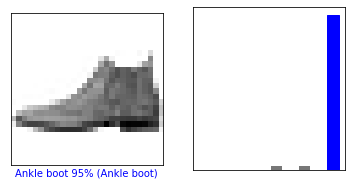

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predict, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predict,  test_labels)
plt.show()

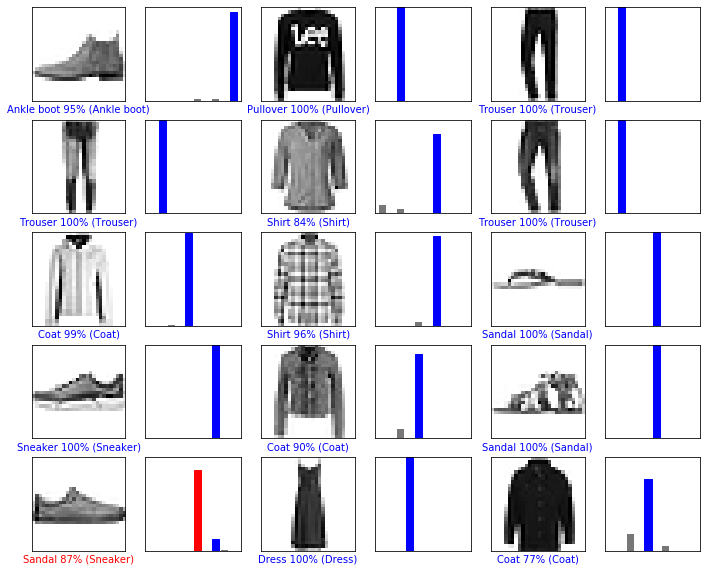

In [37]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predict, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predict, test_labels)
plt.show()

In [39]:
# 이미지 하나만 예측
img = test_images[0]

print(img.shape)

img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

(28, 28)
(1, 28, 28)
[[3.02001739e-05 1.37985551e-09 1.47995293e-07 3.58976484e-07
  5.77638134e-07 2.40577454e-02 2.22878828e-05 2.43223577e-02
  1.70777147e-04 9.51395546e-01]]


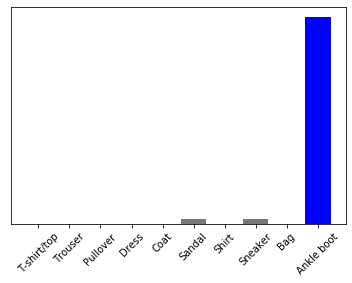

In [40]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)